# Name:Mohammed Ashraf 

# Company:Oasis Infobyte

# project:IRIS FLOWER CLASSIFICATION

In [1]:
#for prerocessing
import pandas as pd
import numpy as np 
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
#for encoding
from sklearn.preprocessing import LabelEncoder
#for the model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# loading my data

In [2]:
df = pd.read_csv("Iris.csv")

# Reading the first rows 

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Reading the last rows

In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# lets see the columns of our data 

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Task

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.


# Describtion

1-Id: This column is likely an identifier for each record in the dataset. It's used to uniquely identify each entry.


2-SepalLengthCm: This column represents the sepal length of a flower in centimeters. The sepal is one of the outermost parts of a flower.


3-SepalWidthCm: This column represents the sepal width of a flower in centimeters. It is the width of one of the outer floral parts.


4-PetalLengthCm: This column represents the petal length of a flower in centimeters. The petal is one of the inner parts of a flower.


5-PetalWidthCm: This column represents the petal width of a flower in centimeters. It is the width of one of the inner floral parts.


6-Species: This column typically contains the species of the Iris flower. In the Iris dataset, there are three species: setosa, versicolor, and virginica. This column is often the target variable in machine learning tasks, where the goal is to predict the species based on the other features.


# lets know information about our data 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.shape

(150, 6)

In [10]:
df.size

900

In [11]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# data preprocessing 

# let's check if our data have duplicated data

In [12]:
df.duplicated().sum()

0

# let's check if our data have null values

In [13]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# let's check if our data have outliers

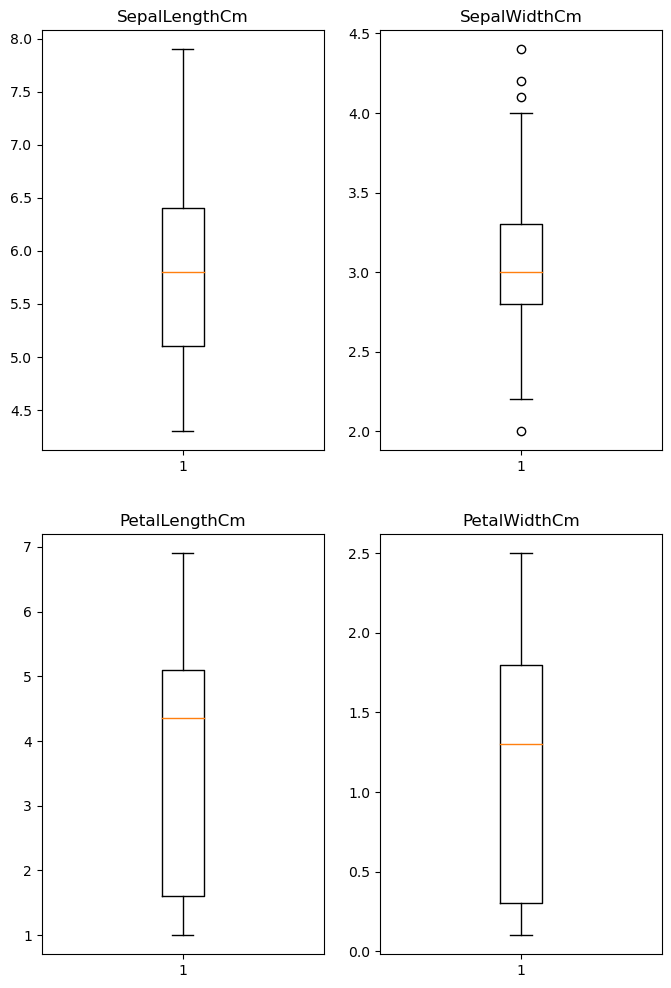

In [14]:
# detecting outliers by using boxplot
fig, ax = plt.subplots(2, 2, figsize=(8, 12))
# Boxplot for SepalLengthCm
ax[0, 0].boxplot(x=df['SepalLengthCm'])
ax[0, 0].set_title('SepalLengthCm')
ax[0, 1].boxplot(x=df['SepalWidthCm'])
ax[0, 1].set_title('SepalWidthCm')
ax[1, 0].boxplot(x=df['PetalLengthCm'])
ax[1, 0].set_title('PetalLengthCm')
ax[1, 1].boxplot(x=df['PetalWidthCm'])
ax[1, 1].set_title('PetalWidthCm')
plt.show()

# Here we see that the column SepalWidthCm have outliers

<Axes: xlabel='SepalWidthCm'>

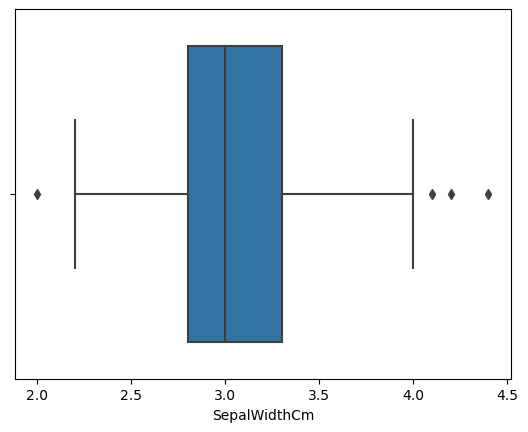

In [15]:
sns.boxplot(x=df['SepalWidthCm'])

In [16]:
Q1 = df.SepalWidthCm.quantile(0.25)
Q3 = df.SepalWidthCm.quantile(0.75)
IQR=Q3-Q1
print(IQR)

0.5


In [17]:
df = df[~((df.SepalWidthCm<(Q1-1.5*IQR))|(df.SepalWidthCm>(Q3+1.5*IQR)))]

# now we see that our column SepalWidthCm does not have outliers anymore

<Axes: xlabel='SepalWidthCm'>

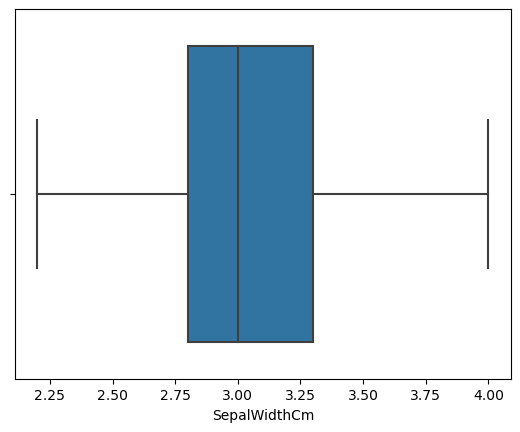

In [18]:
sns.boxplot(x=df['SepalWidthCm'])

In [19]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data visualization

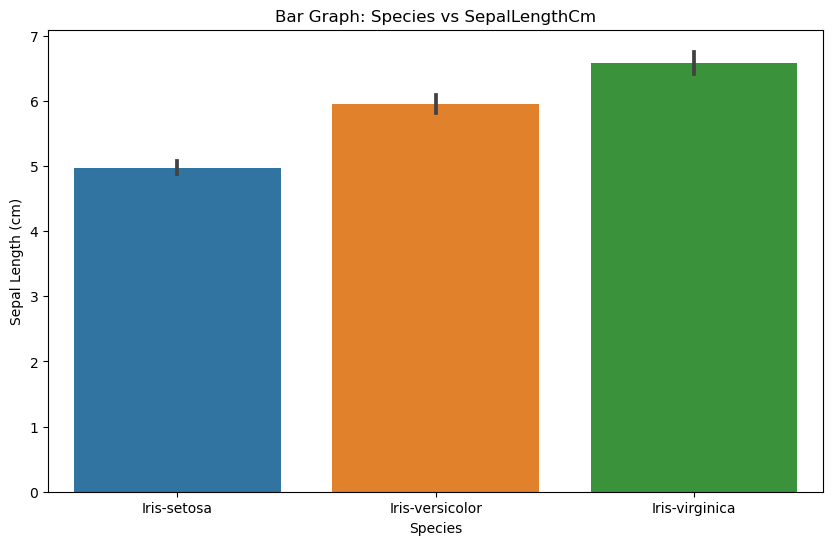

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='SepalLengthCm', data=df) 
plt.title('Bar Graph: Species vs SepalLengthCm')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

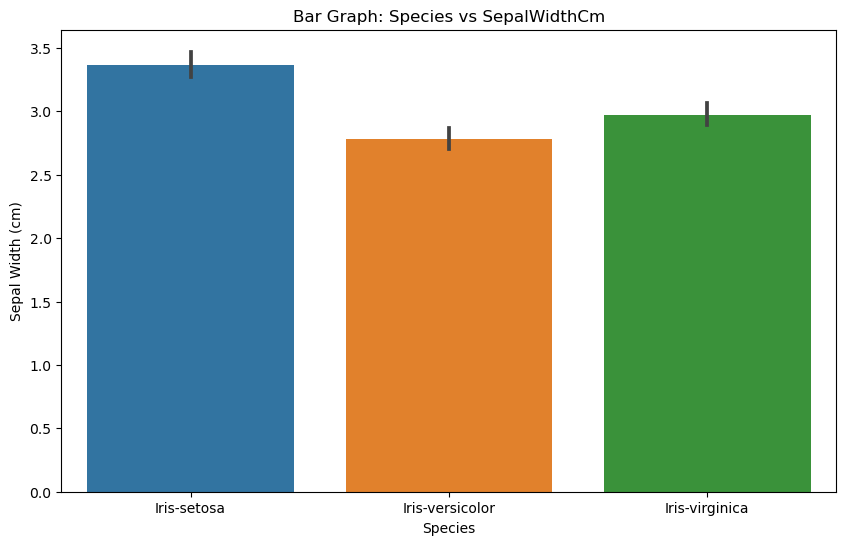

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='SepalWidthCm', data=df) 
plt.title('Bar Graph: Species vs SepalWidthCm')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

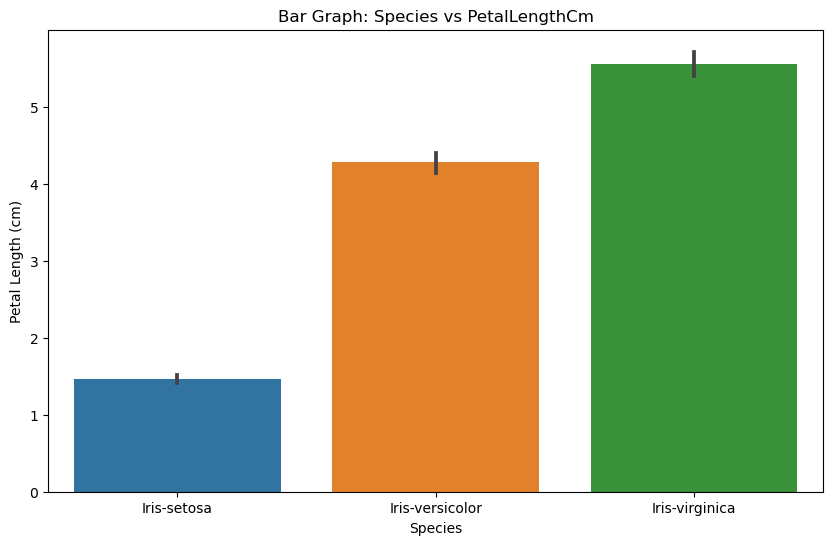

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='PetalLengthCm', data=df) 
plt.title('Bar Graph: Species vs PetalLengthCm')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

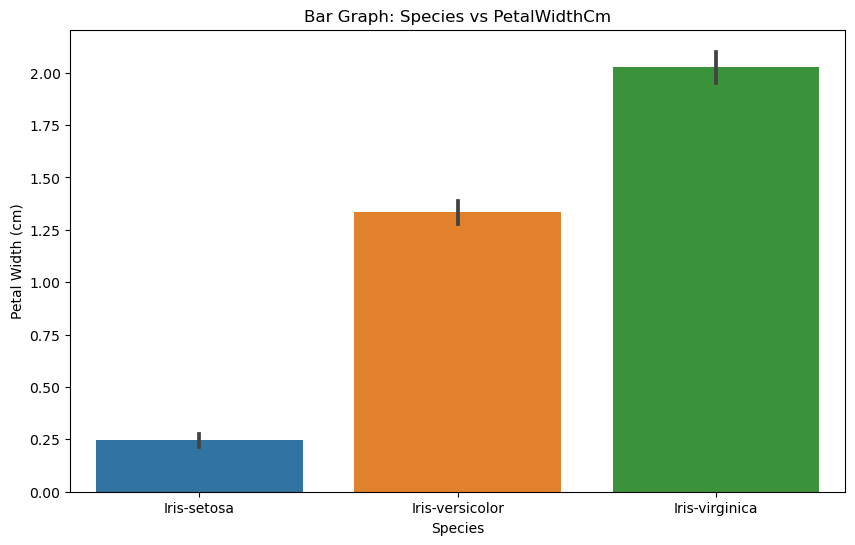

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='PetalWidthCm', data=df) 
plt.title('Bar Graph: Species vs PetalWidthCm')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

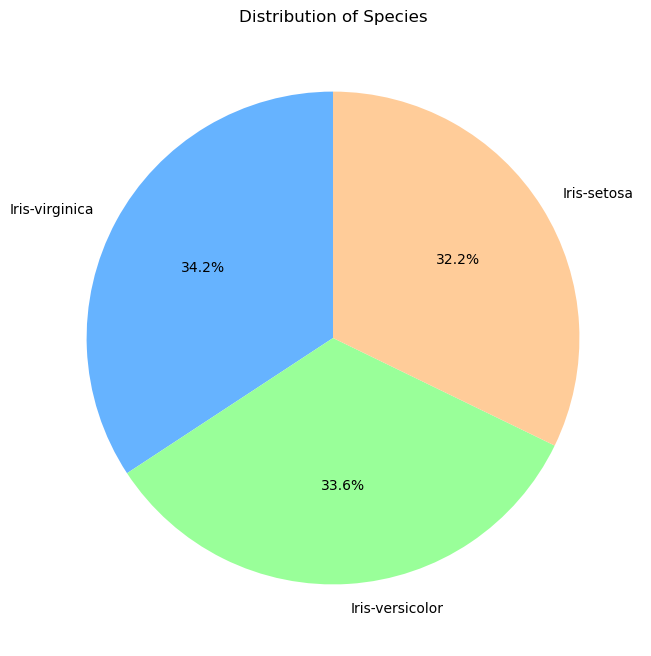

In [24]:
species_counts = df['Species'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Species')
plt.show()


# Correlation 

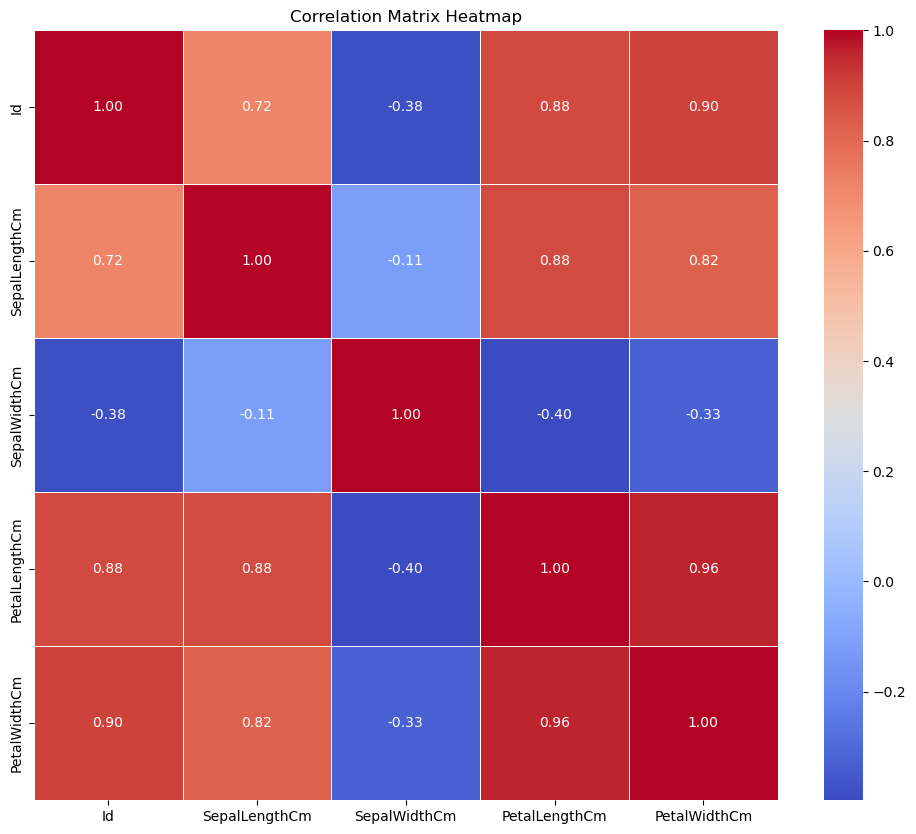

In [25]:
# Now select only numeric columns
numeric_df_encoded = df.select_dtypes(include=['number'])

correlation_matrix_encoded = numeric_df_encoded.corr()

# Create a heatmap for the encoded dataframe
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# doing label encoder for object column (Species)

In [26]:
label_encoder = LabelEncoder()
df['SpeciesEncoded'] = label_encoder.fit_transform(df['Species'])

# Display the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [27]:
df.dtypes

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species            object
SpeciesEncoded      int32
dtype: object

In [28]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesEncoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [29]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'SpeciesEncoded'],
      dtype='object')

# lets build our model 

In [30]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y = df['SpeciesEncoded']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (to improve performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.93
Confusion Matrix:
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



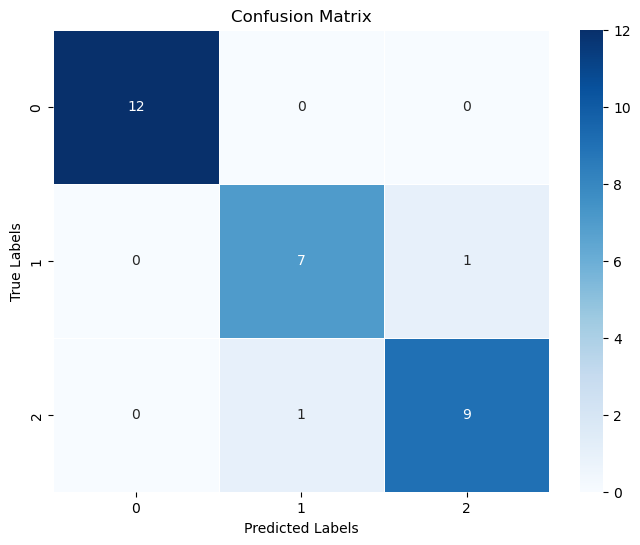

In [31]:
#visualize confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [32]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesEncoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [33]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
df['SpeciesEncoded'].unique()

array([0, 1, 2])

# applying the modeling

In [35]:
# Split the data into features (X) and target variable (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y = df['SpeciesEncoded']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Input values from the user for new data
sepal_length = float(input("Enter the Sepal Length (cm): "))
sepal_width = float(input("Enter the Sepal Width (cm): "))
petal_length = float(input("Enter the Petal Length (cm): "))
petal_width = float(input("Enter the Petal Width (cm): "))

# Create a DataFrame for new data
new_data = pd.DataFrame({
    'SepalLengthCm': [sepal_length],
    'SepalWidthCm': [sepal_width],
    'PetalLengthCm': [petal_length],
    'PetalWidthCm': [petal_width]
})

# Make predictions on the new data using the trained model
new_pred = model.predict(new_data)

#mapping prediction 
class_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

# Map the predicted class label to species name
predicted_species = class_mapping[new_pred[0]]

# Display the results
print("-------------------------------------")
print("Predicted Species: {}".format(predicted_species))


Enter the Sepal Length (cm): 6
Enter the Sepal Width (cm): 2
Enter the Petal Length (cm): 3
Enter the Petal Width (cm): 1.8
-------------------------------------
Predicted Species: Iris-versicolor


In [36]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesEncoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


# Thanks Oasis_infobyte